#### t-SNE Visualization
t-distributed Stochastic Neighbour Embedding (or t-SNE) is a technique that can be used to visualize clusters in high-dimensional data. t-SNE will maximize the distance in two-dimensional space between observations that are most different in a high-dimensional space. Because of this, observations that are similar will be close to one another and may become clustered. Let's apply this to the wholesale customers dataset. 



In [20]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HOGENT-Databases/BI-BigData/master/data/wholesale_customers_data.csv'
dataset=pd.read_csv(url,sep=',')

dataset.head()




,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


t-SNE does not work with non-numeric data but here we only have numeric data. However wo do have the 'Channel' column which is categorical in nature and decide to drop i. 

We'll create a TSNE() model with learning rate 50. While fitting to the dataset, t-SNE will try different configurations and evaluate these with an internal cost function. High learning rates will cause the algorithm to be more adventurous in the configurations it tries out while low learning rates will cause it to be conservative. Usually, learning rates fall in the 10 to 1000 range. Next, we'll fit and transform the TSNE model to our numeric dataset. This will project our high-dimensional dataset onto a NumPy array with two dimensions.

In [21]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

dataset2 = dataset.drop('Channel',axis=1)
tnse_features = m.fit_transform(dataset)

tnse_features[1:4,:]


array([[ 8.3563795, -7.8109407],
       [ 9.998736 , -3.1882684],
       [-7.136756 , 15.634108 ]], dtype=float32)

In [22]:
# We'll assign these two dimensions back to our original dataset naming them 'x' and 'y'.
dataset2['x'] = tnse_features[:,0]
dataset2['y'] = tnse_features[:,1]

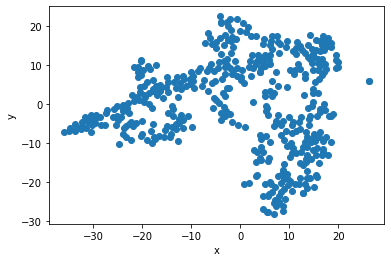

In [23]:
# Plot the result on the x and y columns we just added
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(dataset2['x'], dataset2['y'])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

The resulting plot shows one big cluster. However, using the categorical feature 'Channel' we excluded from the analysis, we can check if there are interesting structural patterns within this cluster. 

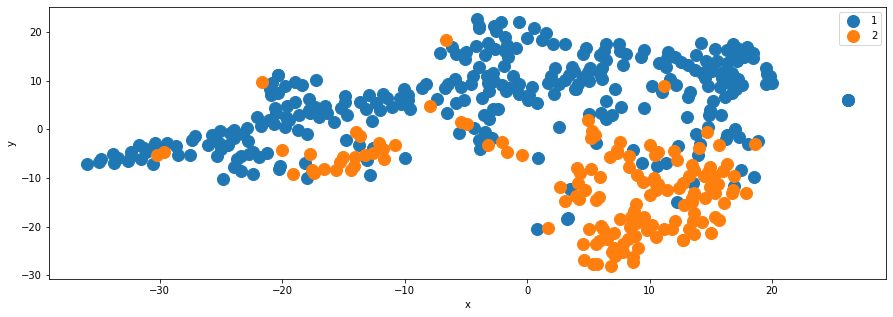

In [24]:
dataset2['Channel'] = dataset['Channel']

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset2.groupby('Channel')
print(groups)
fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('x')
plt.ylabel('y')
    
ax.legend()

We see clearly two clusters, which means there is a different purchase behaviour between channels 1 and 2. This can be a starting point for further analysis. 